## Visualizing intermediate activations

Visualizing intermediate activations consists of displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input (the output of a layer is often called its activation, the output of the activation function).

In [1]:
# import modules
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3
from keras.applications import VGG16
from keras.callbacks import Callback
from keras import models
from keras import layers
from keras import regularizers

# load model
conv_base = InceptionV3(weights='imagenet', input_shape=(299, 299, 3), include_top=False, pooling='max', classes=5)
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 10245     
Total params: 21,813,029.0
Trainable params: 21,778,597.0
Non-trainable params: 34,432.0
_________________________________________________________________


## Create function for displaying colour channels

In [7]:
def print_conv_layer(model, img):
    img_batch = np.expand_dims(img, axis=0)
    conv_img = model.predict(img_batch)

    conv_img = np.squeeze(conv_img, axis=0)
    print(conv_img.shape)
    conv_img = conv_img.reshape(conv_img.shape[:2])
    
    print(conv_img.shape)
    plt.imshow(conv_img)

## New Activation layer in model pipeline

(297, 297, 1)
(297, 297)


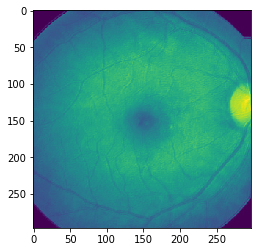

In [46]:
# import tools for visualization
%matplotlib inline
from keras.layers import Convolution2D, Activation, MaxPooling2D
from keras import models
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('sample/processed.jpeg')
model = models.Sequential()
model.add(Convolution2D(1, (3, 3), input_shape=img.shape))
# activation layer
model.add(Activation('relu'))
print_conv_layer(model, img)

## Add Pooling layer

(59, 59, 1)
(59, 59)


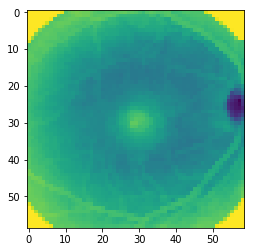

In [47]:
model = models.Sequential()
model.add(Convolution2D(1, (3, 3), input_shape=img.shape))
# pooling layer
model.add(MaxPooling2D(pool_size=(5, 5)))
print_conv_layer(model, img)

## All together now!

(148, 148, 1)
(148, 148)


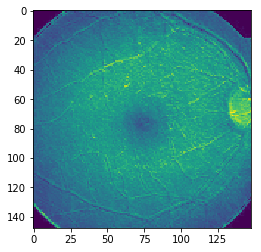

In [56]:
model = models.Sequential()
model.add(Convolution2D(1, (3, 3), input_shape=img.shape))
# activation + pooling layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
print_conv_layer(model, img)